# HW1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
from plotDecBoundaries import plotDecBoundaries
import math

In [2]:
def euclidean_distance(x1,x2): 
    '''
    euclidean distance between vectors x1 and x2
    '''
    return np.linalg.norm(x1-x2,ord = 2,axis = 1)

In [3]:
def get_Indices(n,S1_train_labels):
    '''
    find the indices of records/ data points which belong to which class
    '''
    index = [] 
    for i in range(1,n+1):
        class_ = []
        for j in range(len(S1_train_labels)):
            if S1_train_labels[j] == i:
                class_.append(j)
        index.append(class_)
    return index   

In [4]:
def get_predicted_labels(n,dataset,sample_mean): 
    predicted_labels = np.zeros(n)
    for cnt, i in enumerate(dataset):
        predicted_labels[cnt] = np.argmin(euclidean_distance(i,sample_mean)) +1
    return predicted_labels

In [5]:
def get_error_rate(predicted_labels, actual_labels):
    error = 0
    for i in range(0,len(predicted_labels)):
        if predicted_labels[i]!= actual_labels[i]:
            error = error +1
    error = error / len(actual_labels)
    return error

In [6]:
def get_error_number(predicted_labels, actual_labels):
    error = 0
    for i in range(0,len(predicted_labels)):
        if predicted_labels[i]!= actual_labels[i]:
            error = error +1
    return error

### (a)

#### Synthetic1 train dataset 

In [7]:
S1_df = pd.read_csv('synthetic1_train.csv',header = None)    
S1_train = S1_df.values #gets the values of the matrix in the dataframe
S1_train_set = S1_train[:,:-1] #index the data and ignore last column (labels)
S1_train_labels = S1_train[:,-1] #labels are the last column
N_tr = S1_train.shape[0]
print(N_tr,'data points')

100 data points


In [9]:
index = get_Indices(2,S1_train_labels)
S1_class_1_ind = index[0]
S1_class_2_ind = index[1]

In [10]:
# find the mean over columns for class 1 & 2.
S1_sample_mean_1 = np.mean(S1_train_set[S1_class_1_ind,:],axis = 0)
S1_sample_mean_2 = np.mean(S1_train_set[S1_class_2_ind,:],axis = 0)
S1_sample_mean = np.stack((S1_sample_mean_1, S1_sample_mean_2), axis=0)

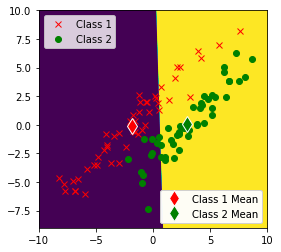

In [11]:
plotDecBoundaries(S1_train_set, S1_train_labels, S1_sample_mean)

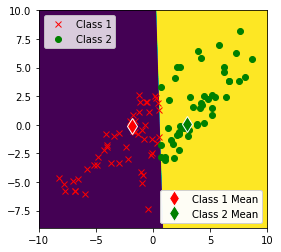

In [12]:
S1_predicted_labels = get_predicted_labels(N_tr,S1_train_set, S1_sample_mean)
plotDecBoundaries(S1_train_set, S1_predicted_labels, S1_sample_mean)

In [13]:
get_error_rate(S1_predicted_labels,S1_train_labels)

0.21

###### The error - rate for training data is 21 %

#### Synthetic1 test dataset 

In [14]:
S1_df2 = pd.read_csv('synthetic1_test.csv',header = None)    
S1_test = S1_df2.values #gets the values of the matrix in the dataframe
S1_test_set = S1_test[:,:-1] #index the data and ignore last column (labels)
S1_test_labels = S1_test[:,-1] #labels are the last column
N_tst = S1_train.shape[0]

In [15]:
S1_predicted_test_labels = get_predicted_labels(N_tst,S1_test_set, S1_sample_mean)

In [16]:
get_error_rate(S1_predicted_test_labels,S1_test_labels)

0.24

###### The error- rate for test data is 24 %

#### Synthetic2 train dataset

In [17]:
S2_df = pd.read_csv('synthetic2_train.csv',header = None)    
S2_train = S2_df.values #gets the values of the matrix in the dataframe
S2_train_set = S2_train[:,:-1] #index the data and ignore last column (labels)
S2_train_labels = S2_train[:,-1] #labels are the last column
N2_tr = S2_train.shape[0]
print(N2_tr,'data points')

100 data points


In [18]:
index = get_Indices(2,S2_train_labels)
S2_class_1_ind = index[0]
S2_class_2_ind = index[1]

In [19]:
# find the mean over columns for class 1 and 2.
S2_sample_mean_1 = np.mean(S2_train_set[S2_class_1_ind,:],axis = 0)
S2_sample_mean_2 = np.mean(S2_train_set[S2_class_2_ind,:],axis = 0)

S2_sample_mean = np.stack((S2_sample_mean_1, S2_sample_mean_2), axis=0)
S2_sample_mean

array([[-0.2032685 ,  2.75522592],
       [ 0.13275594, -2.0526066 ]])

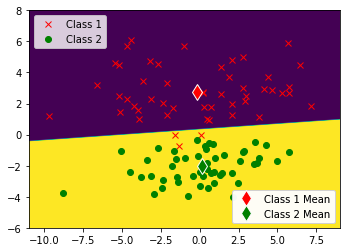

In [20]:
plotDecBoundaries(S2_train_set, S2_train_labels, S2_sample_mean)

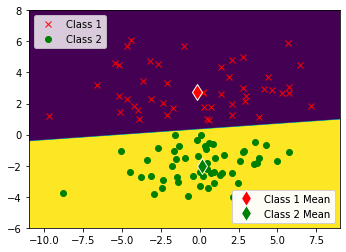

In [21]:
S2_predicted_labels = get_predicted_labels(N2_tr,S2_train_set, S2_sample_mean)
plotDecBoundaries(S2_train_set, S2_predicted_labels, S2_sample_mean)

In [22]:
get_error_rate(S2_predicted_labels,S2_train_labels)

0.03

###### The error- rate for train data is 3 %

#### Synthetic2 test dataset 

In [23]:
S2_df2 = pd.read_csv('synthetic2_test.csv',header = None)    
S2_test = S2_df2.values #gets the values of the matrix in the dataframe
S2_test_set = S2_test[:,:-1] #index the data and ignore last column (labels)
S2_test_labels = S2_test[:,-1] #labels are the last column
N2_tst = S2_train.shape[0]

In [24]:
S2_predicted_test_labels = get_predicted_labels(N2_tst,S2_test_set, S2_sample_mean)

In [25]:
get_error_rate(S2_predicted_test_labels,S2_test_labels)

0.04

###### The error- rate for test data is 4 %

### (c)

###### train dataset

In [26]:
W1_df = pd.read_csv('wine_train.csv',header = None)    
W1_train = W1_df.values #gets the values of the matrix in the dataframe
W1_train_set = W1_train[:,:2] #index the data and consider first two features
W1_train_labels = W1_train[:,-1] #labels are the last column
N_W_tr = W1_train.shape[0]
print(N_W_tr,'data points')

89 data points


In [27]:
index = get_Indices(3,W1_train_labels)
W1_class_1_ind = index[0]
W1_class_2_ind = index[1]
W1_class_3_ind = index[2]

In [28]:
# find the mean over columns for class 1,2,3
W1_sample_mean_1 = np.mean(W1_train_set[W1_class_1_ind,:],axis = 0)
W1_sample_mean_2 = np.mean(W1_train_set[W1_class_2_ind,:],axis = 0)
W1_sample_mean_3 = np.mean(W1_train_set[W1_class_3_ind,:],axis = 0)

W1_sample_mean = np.stack((W1_sample_mean_1, W1_sample_mean_2,W1_sample_mean_3), axis=0)
W1_sample_mean

array([[13.675     ,  1.904     ],
       [12.21457143,  1.88885714],
       [13.17333333,  3.28333333]])

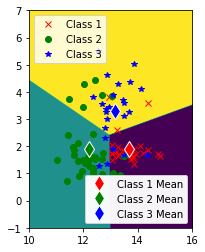

In [29]:
plotDecBoundaries(W1_train_set, W1_train_labels, W1_sample_mean)

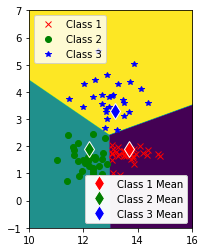

In [30]:
W1_predicted_labels = get_predicted_labels(N_W_tr,W1_train_set, W1_sample_mean)
plotDecBoundaries(W1_train_set, W1_predicted_labels, W1_sample_mean)

In [31]:
get_error_rate(W1_predicted_labels,W1_train_labels)

0.20224719101123595

###### The error- rate for train data is 20.22 %

###### test dataset

In [32]:
W1_df2 = pd.read_csv('wine_test.csv',header = None)    
W1_test = W1_df2.values #gets the values of the matrix in the dataframe
W1_test_set = W1_test[:,:2] #index the data and get first two columns
W1_test_labels = W1_test[:,-1] #labels are the last column
N_W_tst = W1_test.shape[0]

In [33]:
W1_predicted_test_labels = get_predicted_labels(N_W_tst,W1_test_set, W1_sample_mean)

In [34]:
get_error_rate(W1_predicted_test_labels,W1_test_labels)

0.2247191011235955

###### The error- rate for test data is 22.47 %

## (d), (e)

###### train dataset

In [35]:
W2_df = pd.read_csv('wine_train.csv',header = None)    
W2_train = W2_df.values #gets the values of the matrix in the dataframe
W2_train_set = W2_train[:,:-1] #index the data and ignore last column (labels)
W2_train_labels = W2_train[:,-1] #labels are the last column
N_W2_tr = W2_train.shape[0]
print(N_W2_tr,'data points')

89 data points


In [53]:
W2_train

array([[1.375e+01, 1.730e+00, 2.410e+00, ..., 2.900e+00, 1.320e+03,
        1.000e+00],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 3.400e+00, 1.050e+03,
        1.000e+00],
       [1.307e+01, 1.500e+00, 2.100e+00, ..., 2.690e+00, 1.020e+03,
        1.000e+00],
       ...,
       [1.253e+01, 5.510e+00, 2.640e+00, ..., 1.690e+00, 5.150e+02,
        3.000e+00],
       [1.288e+01, 2.990e+00, 2.400e+00, ..., 1.420e+00, 5.300e+02,
        3.000e+00],
       [1.373e+01, 4.360e+00, 2.260e+00, ..., 1.750e+00, 5.200e+02,
        3.000e+00]])

In [55]:
W2_train[:,1:2]

array([[1.73],
       [1.78],
       [1.5 ],
       [1.35],
       [1.8 ],
       [1.65],
       [1.64],
       [3.8 ],
       [1.9 ],
       [1.73],
       [1.64],
       [1.87],
       [1.89],
       [1.76],
       [1.57],
       [3.59],
       [1.81],
       [1.53],
       [2.02],
       [1.77],
       [1.86],
       [1.67],
       [1.73],
       [2.05],
       [1.81],
       [1.97],
       [2.59],
       [1.73],
       [1.72],
       [1.66],
       [0.98],
       [1.75],
       [1.45],
       [1.61],
       [1.88],
       [4.3 ],
       [1.39],
       [1.53],
       [2.45],
       [1.01],
       [4.43],
       [1.47],
       [1.53],
       [0.74],
       [1.61],
       [2.13],
       [2.4 ],
       [1.67],
       [0.94],
       [3.86],
       [1.51],
       [3.74],
       [0.89],
       [1.61],
       [1.17],
       [1.66],
       [1.07],
       [0.94],
       [1.51],
       [1.99],
       [1.09],
       [1.29],
       [1.21],
       [3.43],
       [3.87],
       [3.59],
       [4.

In [36]:
index = get_Indices(3,W2_train_labels)
W2_class_1_ind = index[0]
W2_class_2_ind = index[1]
W2_class_3_ind = index[2]

In [37]:
# find the mean over columns for class 1,2,3
W2_sample_mean_1 = np.mean(W2_train_set[W2_class_1_ind,:],axis = 0)
W2_sample_mean_2 = np.mean(W2_train_set[W2_class_2_ind,:],axis = 0)
W2_sample_mean_3 = np.mean(W2_train_set[W2_class_3_ind,:],axis = 0)

W2_sample_mean = np.stack((W2_sample_mean_1, W2_sample_mean_2,W2_sample_mean_3), axis=0)
# W2_sample_mean

In [38]:
Minimum_error_train = 500
N_features = W2_train.shape[1]
W2_err_labels = np.zeros(N_W2_tr)
features_train= []
train_error_rates = []
for i in range(0,N_features-2):
    for j in range(i+1,N_features-1):
        W2_predicted_labels = get_predicted_labels(N_W2_tr,W2_train_set[:,[i, j]], W2_sample_mean[:,[i, j]])
        error = get_error_number(W2_predicted_labels,W2_train_labels)
        train_error_rates.append((error/len(W2_train),i,j))
        if error < Minimum_error_train:
            Minimum_error_train = error
            features_train = [i,j]
W2_Train_Error = Minimum_error_train / len(W2_train)
W2_Train_Error


0.07865168539325842

######  Minimum Train Error rate = 7.865168539325842 %

In [39]:
for er in train_error_rates:
    print("Error rate of feature " ,er[1], " and ", er[2], " is ", er[0] )
max(train_error_rates)[0]

Error rate of feature  0  and  1  is  0.20224719101123595
Error rate of feature  0  and  2  is  0.3146067415730337
Error rate of feature  0  and  3  is  0.449438202247191
Error rate of feature  0  and  4  is  0.5617977528089888
Error rate of feature  0  and  5  is  0.14606741573033707
Error rate of feature  0  and  6  is  0.0898876404494382
Error rate of feature  0  and  7  is  0.33707865168539325
Error rate of feature  0  and  8  is  0.16853932584269662
Error rate of feature  0  and  9  is  0.25842696629213485
Error rate of feature  0  and  10  is  0.25842696629213485
Error rate of feature  0  and  11  is  0.07865168539325842
Error rate of feature  0  and  12  is  0.24719101123595505
Error rate of feature  1  and  2  is  0.39325842696629215
Error rate of feature  1  and  3  is  0.39325842696629215
Error rate of feature  1  and  4  is  0.5730337078651685
Error rate of feature  1  and  5  is  0.29213483146067415
Error rate of feature  1  and  6  is  0.20224719101123595
Error rate of fea

0.5730337078651685

In [40]:
print("Standard deviation: ",np.std(train_error_rates,axis = 0)[0])

Standard deviation:  0.12836178879103916


In [41]:
best_W2_train_set = W2_train[:,[0, 11]]

In [42]:
best_W2_sample_mean_1 = np.mean(best_W2_train_set[W2_class_1_ind,:],axis = 0)
best_W2_sample_mean_2 = np.mean(best_W2_train_set[W2_class_2_ind,:],axis = 0)
best_W2_sample_mean_3 = np.mean(best_W2_train_set[W2_class_3_ind,:],axis = 0)

best_W2_sample_mean = np.stack((best_W2_sample_mean_1, best_W2_sample_mean_2, best_W2_sample_mean_3), axis=0)
best_W2_sample_mean

array([[13.675     ,  3.127     ],
       [12.21457143,  2.73714286],
       [13.17333333,  1.59416667]])

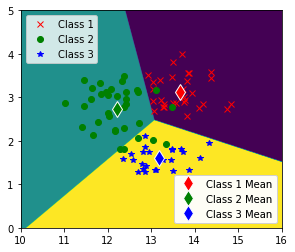

In [43]:
plotDecBoundaries(best_W2_train_set, W2_train_labels, best_W2_sample_mean)

###### For the best two features:
Features which gives best result is Feature 1 and Feature 12.

Minimum Train Error_Rate = 0.07865168539325842 ~ 7.86 %

###### test dataset

In [44]:
W2_df2 = pd.read_csv('wine_test.csv',header = None)    
W2_test = W2_df2.values #gets the values of the matrix in the dataframe
W2_test_set = W2_test[:,:-1] #index the data and ignore last column (labels)
W2_test_labels = W2_test[:,-1] #labels are the last column
N_W2_tst = W2_test.shape[0]

In [45]:
Minimum_error_test = 500
N_features = W2_test.shape[1]
W2_err_labels = np.zeros(N_W2_tst)
features_test= []
test_error_rates = []
for i in range(0,N_features-2):
    for j in range(i+1,N_features-1):
        W2_predicted_test_labels = get_predicted_labels(N_W2_tr,W2_test_set[:,[i, j]], W2_sample_mean[:,[i, j]])
        error = get_error_number(W2_predicted_test_labels,W2_test_labels)
        test_error_rates.append((error/len(W2_test),i,j))
        if error < Minimum_error_test:
            Minimum_error_test = error
            features_test = [i,j]
W2_Test_Error = Minimum_error_test / len(W2_test)
W2_Test_Error

0.11235955056179775

###### Minimum Test Error rate = 11.235955056179775 %

In [46]:
for er in test_error_rates:
    print("Error rate of feature " ,er[1], " and ", er[2], " is ", er[0] )
max(test_error_rates)[0]

Error rate of feature  0  and  1  is  0.2247191011235955
Error rate of feature  0  and  2  is  0.2808988764044944
Error rate of feature  0  and  3  is  0.4044943820224719
Error rate of feature  0  and  4  is  0.449438202247191
Error rate of feature  0  and  5  is  0.15730337078651685
Error rate of feature  0  and  6  is  0.11235955056179775
Error rate of feature  0  and  7  is  0.2808988764044944
Error rate of feature  0  and  8  is  0.24719101123595505
Error rate of feature  0  and  9  is  0.2247191011235955
Error rate of feature  0  and  10  is  0.2696629213483146
Error rate of feature  0  and  11  is  0.12359550561797752
Error rate of feature  0  and  12  is  0.30337078651685395
Error rate of feature  1  and  2  is  0.38202247191011235
Error rate of feature  1  and  3  is  0.42696629213483145
Error rate of feature  1  and  4  is  0.43820224719101125
Error rate of feature  1  and  5  is  0.29213483146067415
Error rate of feature  1  and  6  is  0.23595505617977527
Error rate of featu

0.5056179775280899

In [47]:
print("Standard deviation: ", np.std(test_error_rates,axis = 0)[0])

Standard deviation:  0.09571906553548874


In [48]:
best_W2_test_set = W2_test[:,[0, 11]]

In [49]:
W2_predicted_test_labels = get_predicted_labels(N_W2_tst,best_W2_test_set, W2_sample_mean[:,[0, 11]])
get_error_rate(W2_predicted_test_labels,W2_test_labels)

0.12359550561797752

###### Test Error rate for best features = 12.359550561797752 %

In [50]:
from platform import python_version

print(python_version())

3.9.7
